In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/product_sentiment.csv')
df.head()

,index,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## On first glance
We have 9093 tweets to start with and 4 fields available. The main text column (tweet_text) which will be the corpus for the model and the sentiment column (is_there_an_emotion_directed_at_a_brand_or_product) which will be used as the response variable. The product column (emotion_in_tweet_is_directed_at) gives us additional data which we can use to coax more information about the tweets. 

In [6]:
df.shape

(9093, 4)

## Missing data
Two columns contain missing data. The products column has a majority of missing data (64%) while the tweets have only one missing value. So let's remove the row where the tweet is missing since this can't be used in this analysis anyway.

In [5]:
df.isnull().sum()

index                                                    0
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [6]:
df_missing_removed = df[~df.tweet_text.isnull()]
df_missing_removed.isnull().sum()

index                                                    0
tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

## Exploring the data
There are 4 values in the sentiment column. 1 of which means inconclusive. In this instance, we will remove it since it cannot be used to validate / classify the data in line with the request. The remaining three give us a multiclass problem; positive, negative and neutral. As with many real world scenarios, we have unbalanced classes with the negative emotions being the minority, the neutral being the majority. 

There are other techniques we can use to give more context/ information to the sentiment of the text such as identifying subjectivity/ objectivity and sarcasm detection, however given the size of the dataset, there would not be much benefit from using these techniques.

In [9]:
df.emotion_in_tweet_is_directed_at.value_counts(dropna=False)

NaN                                5802
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: emotion_in_tweet_is_directed_at, dtype: int64

<AxesSubplot:>

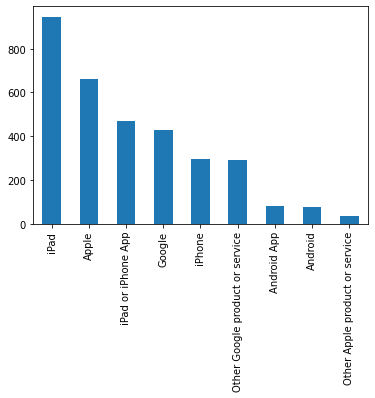

In [11]:
df.emotion_in_tweet_is_directed_at.value_counts().plot(kind='bar')

<AxesSubplot:>

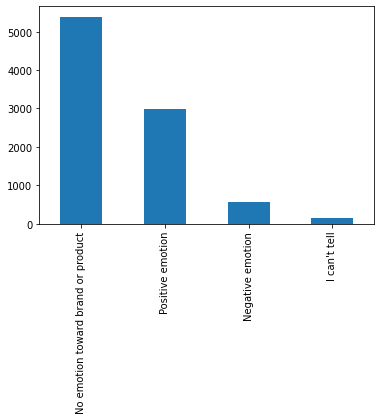

In [12]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot:xlabel='emotion_in_tweet_is_directed_at'>

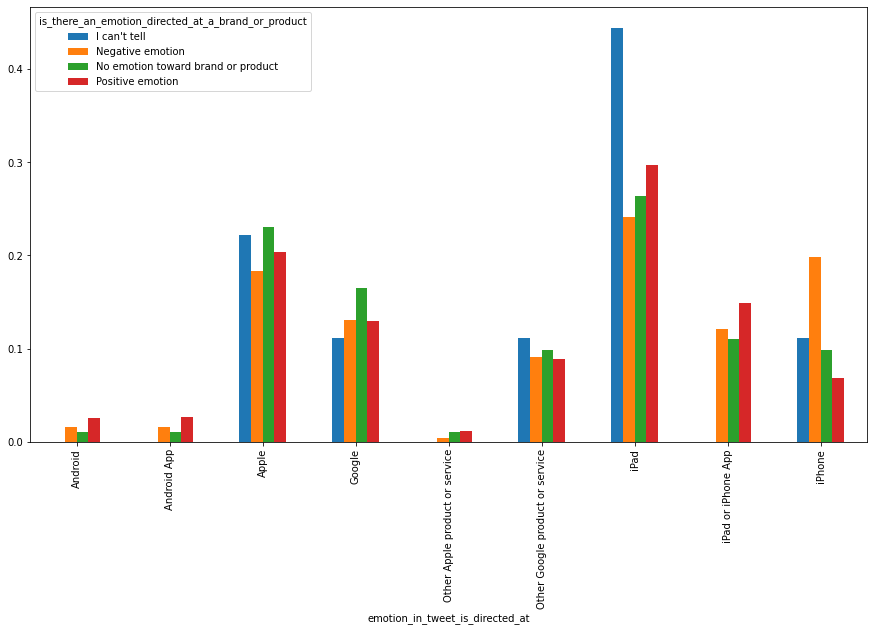

In [19]:
## Proporational frequencies
df.groupby('is_there_an_emotion_directed_at_a_brand_or_product').emotion_in_tweet_is_directed_at.value_counts(normalize=True).unstack(0).plot(kind='bar', figsize=(15,8))

## Duplicates
No duplicates found

In [4]:
df.duplicated().sum()

0

## Let's take a look at the text
Since we haven't got much data, the decision to lemmatise will leave us with a bigger pool of terms to weight on. Not all mentions removed. Using informal language with plenty of implicit statements. Spelling errors that can reduce our pool if not corrected. Subjective and objective statements.

In [20]:
print([x for x in df.tweet_text[32:50]])

['Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. {link}', 'Anyone at  #sxsw want to sell their old iPad?', 'Anyone at  #SXSW who bought the new iPad want to sell their older iPad to me?', 'At #sxsw.  Oooh. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link}', 'The best!  RT @mention Ha! First in line for #ipad2 at #sxsw &quot;pop-up&quot; Apple store was an event planner #eventprofs #pcma #engage365', 'SPIN Play - a new concept in music discovery for your iPad from @mention &amp; spin.com {link} #iTunes #sxsw @mention', '@mention  - False Alarm: Google Circles Not Coming Now\x89ÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW', 'VatorNews - Google And Apple Force Print Media to Evolve? {link} #sxsw', '@mention  - Great weather to greet you for #sxsw! Still need a sweater at night..Apple putting up &quot;flash store&quot; downtown to sell iPad2', 'HootSuite - HootSuite Mobile for #SXSW 

In [21]:
print([x for x in df.tweet_text[4005:4020]])

['@mention Kenya asked me to blog about it. I may do so tomorrow. Apple has a pop-up store coming to #SXSW', "i hope u kept tha NXDC app RT @mention There's an app for #SXSW on the iPhone.. #downloaded", 'Heartbreaker #Sxsw #apple #ipad2 RT @mention @mention just asked. Sadly no :(', 'Heat Tracker is a cool heatmap iPhone app overlay for Foursquare, but everything is on fire here #SXSW', 'iPad2 seekers still waiting at Austin Apple pop-up #SXSW {link}', '#iPad2 takes over #sxsw. The line was already halfway down the block around noon. Craziness (via @mention  {link}', "Google takes the mantra of 'Dont be evil' to heart, yet their pride in their products make them guilty of the 7th deadly sin, Superbia #sxsw", 'Apple marketing is still impressive at #SXSW RT@mention {link}', "Jesus hockey mask?! I'm worse than I thought... #SXSW @mention Apple Store, SXSW {link}", 'I got turkey! RT @mention Random Apple Fan just bought lunch for everyone in line at #SXSW Popup Apple Store #ipad2 cc/ @me